### Problem Definition

#### Situation:
The company needs to increase retention rate by running email campaigns specifically designed for customers who are more likely to churn. The lack of a way to recognize customers who are likely to churn could make this marketing campaign ineffective.

#### Complication
The team lacks the tools and the means to identify customers with high potential of churning.

#### Question
How can we identify a customer who is very likely to churn?

#### Desired future state
The team now has the desired tools to identify customers who are likely to churn. They can now target these customers with their email campaigns and improve retention rates

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("download/riding/telco-customer-churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's find out the value counts of the labels in our data

In [6]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the information above we have a dataset containing 21 columns (20 features and 1 target) with 7043 rows. 

There are no null values in the data.

The MonthlyCharges, tenure and SeniorCitizen columns are identified as numeric datatype, while the rests are objects. 

There is an error because the TotalCharges column was incorrectly identified as an object intead of float since it contains numbers.

The rest of the columns contain categorical data, some of the columns are in text while others are in numbers.

In [7]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

Since we have converted the column into a numeric column we check if there is any changes to the integrity of the data in the column

In [8]:
pd.DataFrame(data["TotalCharges"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


As we can see the datatype das been changed to float64.
But now we have a problem. There seems to be null values since the total number of rows is 7043 while the number of non null rows in the TotalCharges column is 7032. Lets find out another way

In [9]:
data["TotalCharges"].isnull().unique()

array([False,  True])

We can see that there is a True value in the returned array, which means there are rows with empty values. Next we try to get the number of rows with empty values

In [10]:
len(data[data["TotalCharges"].isnull() == True])

11

In [11]:
data[data["TotalCharges"].isnull() == True]["Churn"]

488     No
753     No
936     No
1082    No
1340    No
3331    No
3826    No
4380    No
5218    No
6670    No
6754    No
Name: Churn, dtype: object

Since there are just eleven rows with empty values and also belong long to the no class of the target category we can drop these rows out of our data.

### Data cleaning

In [12]:
data.dropna(inplace=True)

customer id column is not needed because it does not tell us anything about the target variable so we drop it.

In [13]:
data.drop(columns="customerID", inplace=True)

Now we remove the extra "automatic" string in the PaymentMethod labels because they don't give extra information.

In [14]:
data["PaymentMethod"] = data["PaymentMethod"].str.replace(" (automatic)","", regex=False)

### Data visualization

In [15]:
churnYes = len(data[data["Churn"] == "Yes"])
churnNo = len(data[data["Churn"] == "No"])
churnCount = [churnYes, churnNo]

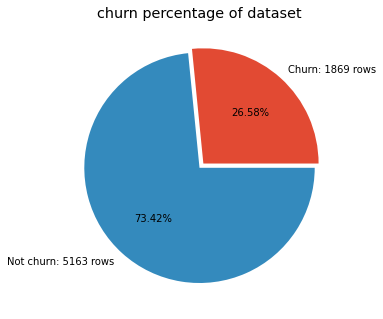

In [16]:
explode = [0.05, 0.0]
categories = ["Churn: " + str(churnYes) + " rows", "Not churn: " + str(churnNo) + " rows"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("churn percentage of dataset")
ax.pie(churnCount, labels = categories, autopct = "%1.2f%%", explode = explode)
plt.show()

From the pie chart we can se that the data is skewed towards those who didnt churn. This might be come an issue when training the model. it could cause the model to be biased.

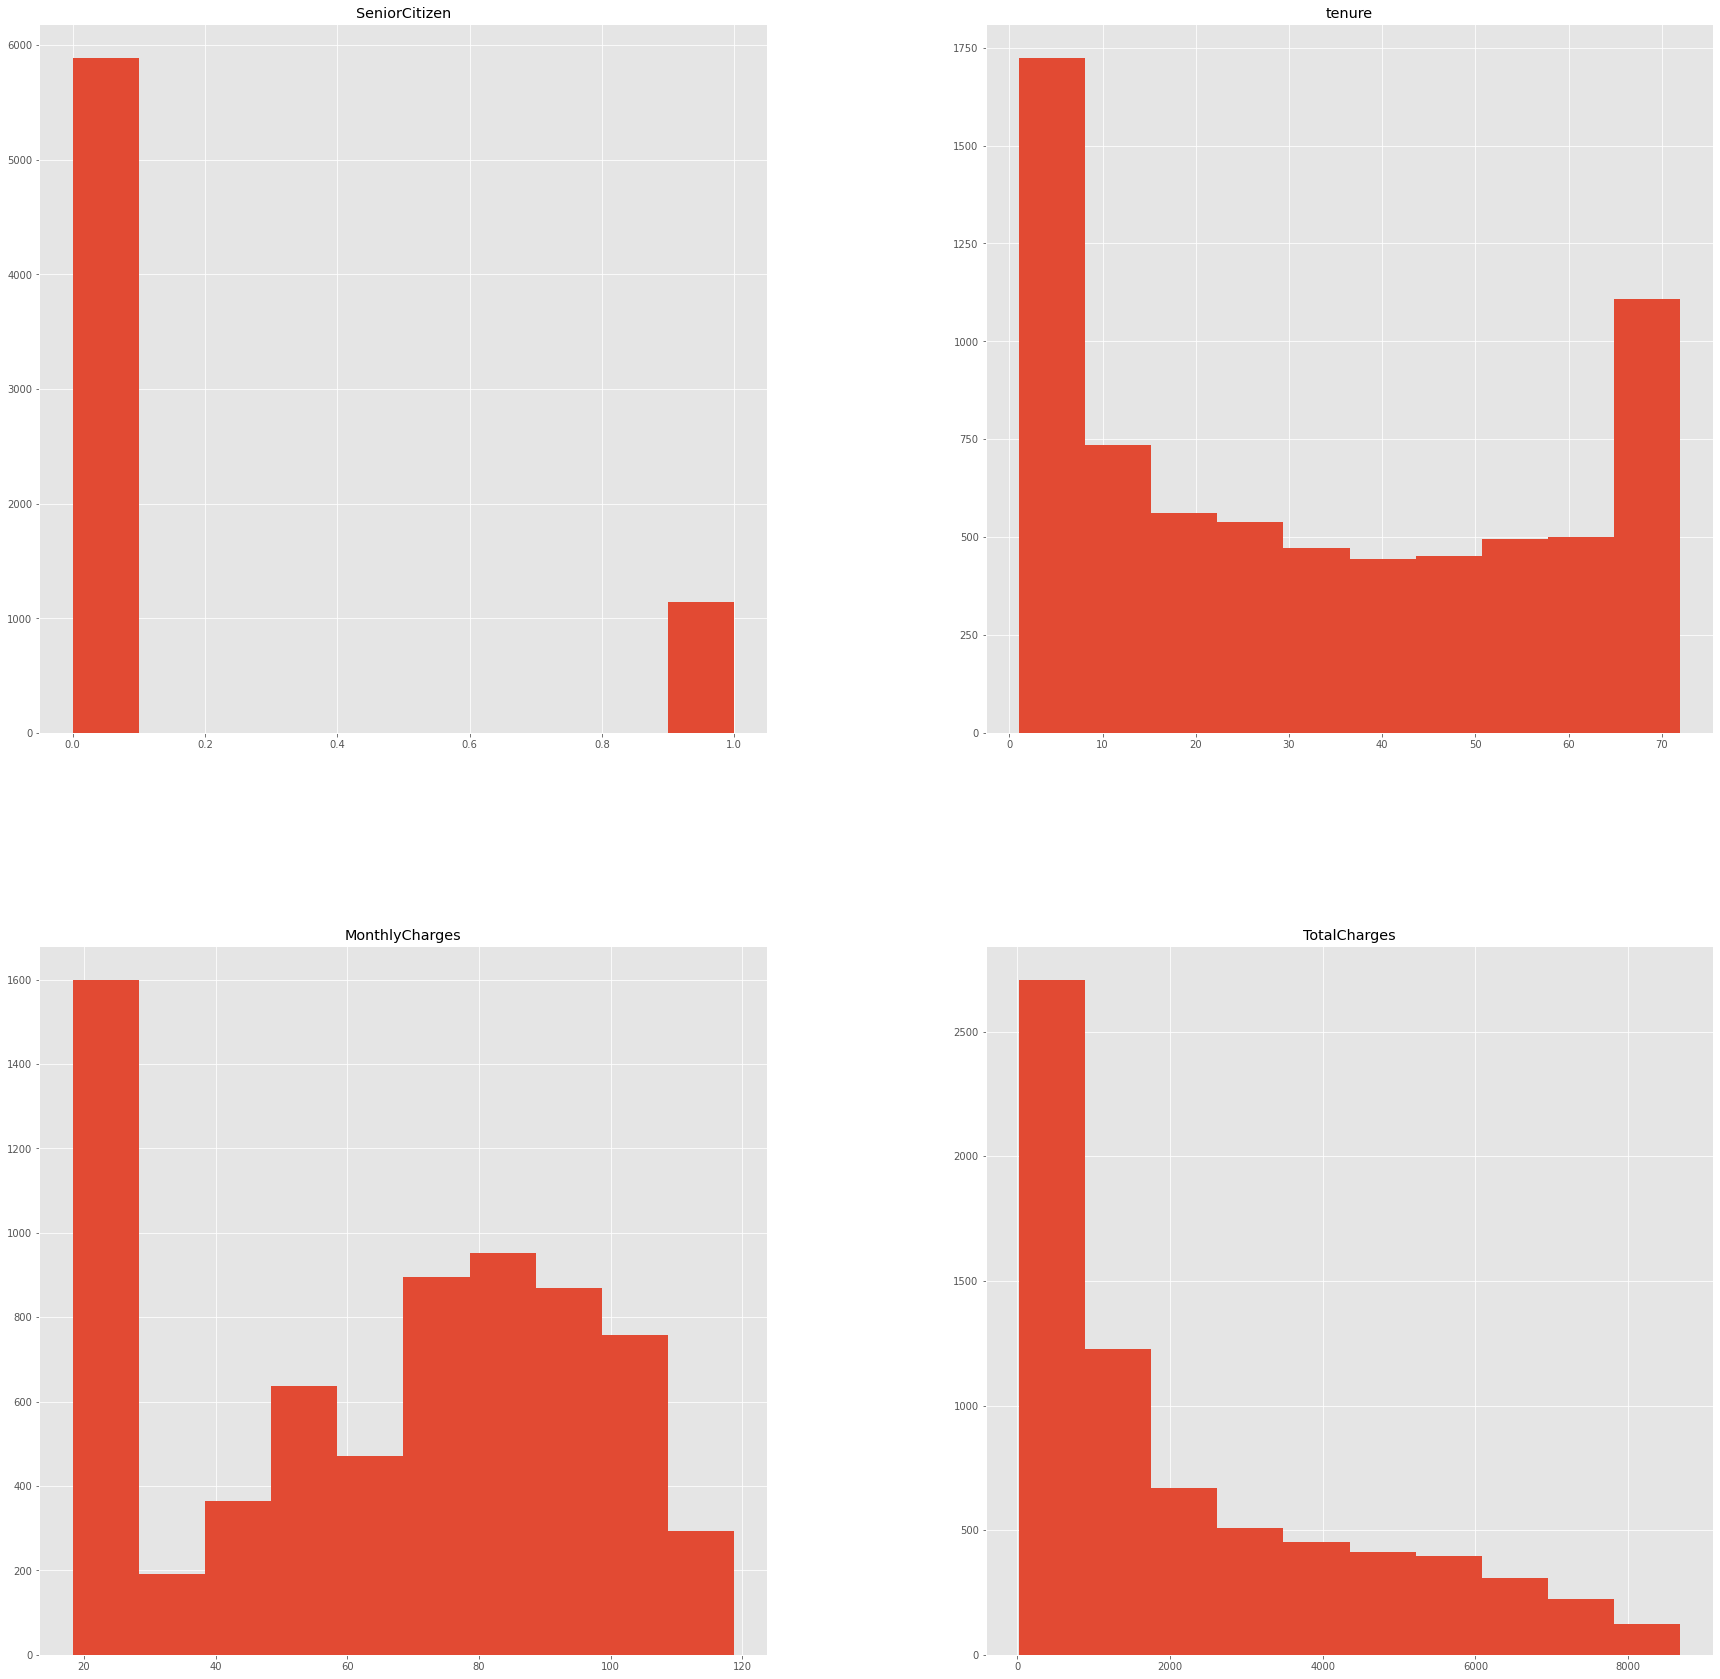

In [17]:
data.hist(figsize=(30,30))
plt.show()

In [18]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


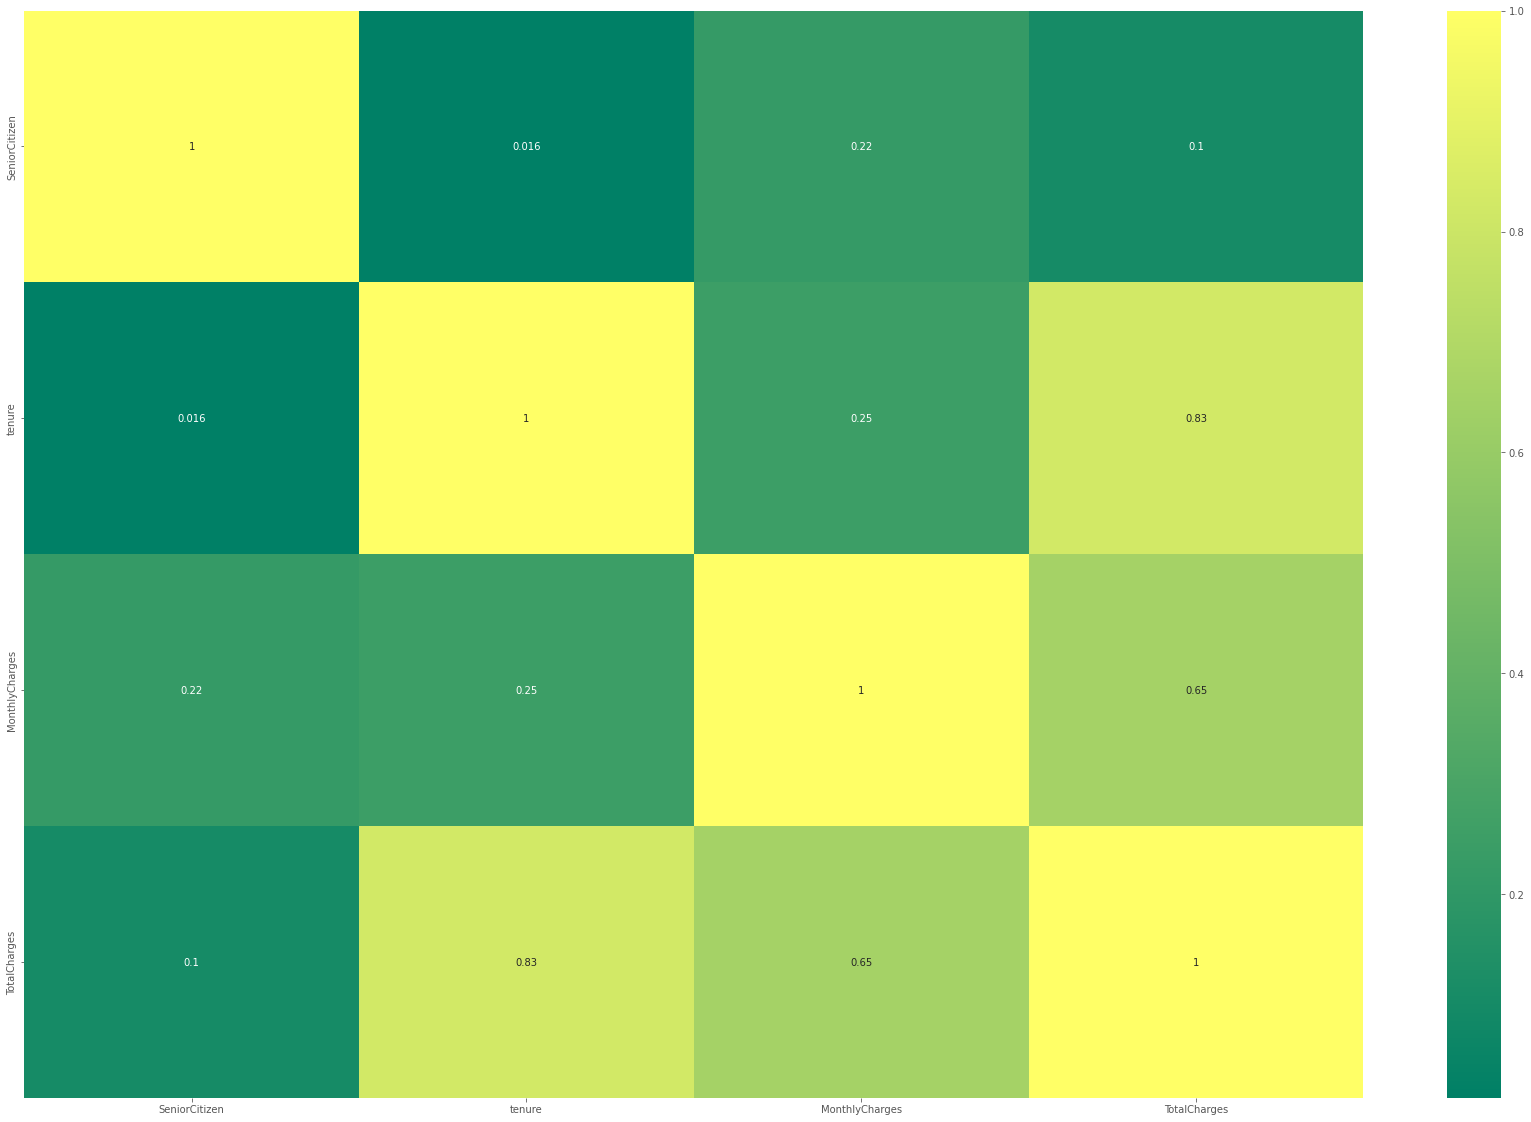

In [19]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True, cmap="summer")
plt.show()

There happens to be a high correlation between tenure and monthly charges which make sense because the longer your tenure the more the accumulation of the total charges.

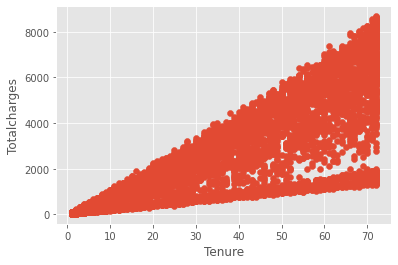

In [20]:
plt.scatter(data["tenure"], data["TotalCharges"])
plt.xlabel("Tenure")
plt.ylabel("Totalcharges")
plt.show()

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_6907/44748196.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


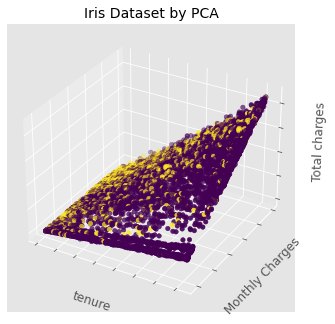

In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
target = enc.fit_transform(data["Churn"])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14) 
ax.scatter(data["tenure"], data["MonthlyCharges"] ,data["TotalCharges"], c=target) 
ax.set_xlabel('tenure')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Total charges')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

The 3d plot above shows that the slope of tenure vs TotalCharges is based on the amount of monthly charge the customer is subscribed to.

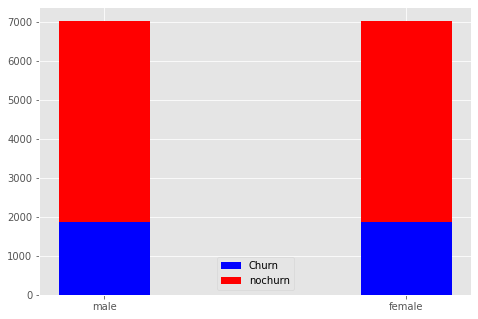

In [22]:
churnmale = len(data[data["Churn"] == "Yes"]["gender"] == "Male")

churnfemale = len(data[data["Churn"] == "Yes"]["gender"] == "Female")

churn = [churnmale, churnfemale]

nochurnmale = len(data[data["Churn"] == "No"]["gender"] == "Male")
nochurnfemale = len(data[data["Churn"] == "No"]["gender"] == "Female")

nochurn = [nochurnmale, nochurnfemale]

cat = ["male", "female"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cat, churn, color="b", width=0.3)
ax.bar(cat, nochurn, color="r", bottom=churn, width=0.3)
plt.legend(labels=["Churn", "nochurn"])
plt.show()

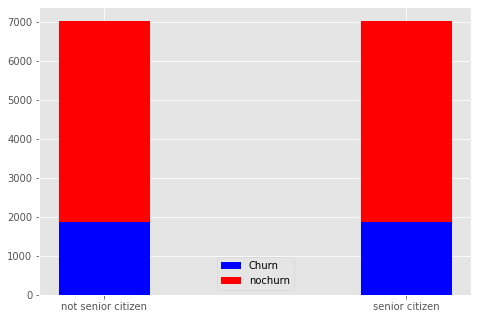

In [23]:
churnseniorNo = len(data[data["Churn"] == "Yes"]["SeniorCitizen"] == 0)

churnseniorYes = len(data[data["Churn"] == "Yes"]["SeniorCitizen"] == 1)

churn = [churnseniorNo, churnseniorYes]

nochurnseniorYes = len(data[data["Churn"] == "No"]["SeniorCitizen"] == 0)
nochurnseniorNo = len(data[data["Churn"] == "No"]["SeniorCitizen"] == 1)

nochurn = [nochurnseniorNo, nochurnseniorYes]

cat = ["not senior citizen", "senior citizen"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cat, churn, color="b", width=0.3)
ax.bar(cat, nochurn, color="r", bottom=churn, width=0.3)
plt.legend(labels=["Churn", "nochurn"])
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
enc = LabelEncoder()
for col in cols:
    data[col] = enc.fit_transform(data[col])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
data[cols].corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.163128
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,-0.195290
DeviceProtection,0.001348,-0.021124,0.165614,0.079723,0.004718,0.122614,0.045558,0.175789,0.187646,1.000000,0.240476,0.275947,0.289309,0.350067,-0.037596,-0.136460,-0.177883


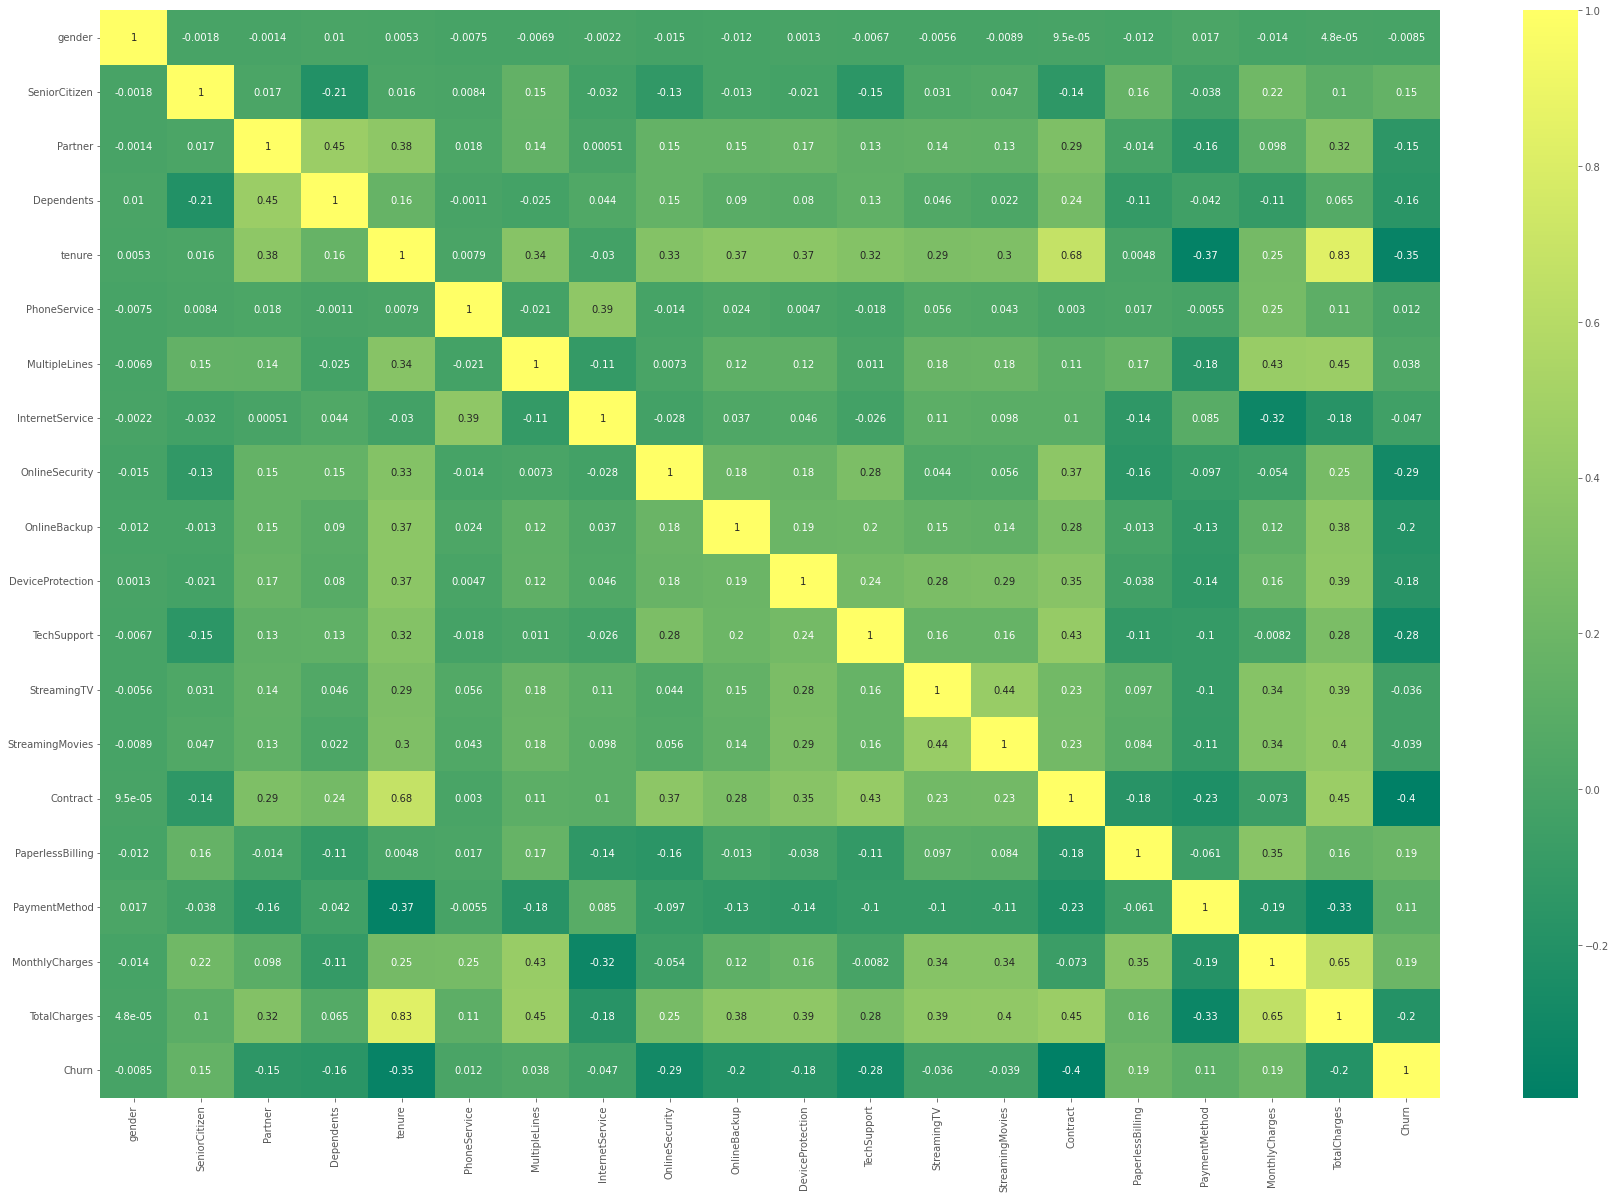

In [27]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True, cmap="summer",)
plt.show()

### Data Normalization

In [28]:
features = data.iloc[:,0:-1]
target = data.iloc[:,-1]

In [29]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
features = norm.fit_transform(features)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(features,  target, random_state = 2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
seed = 2
knn = KNeighborsClassifier()
svc = SVC(random_state=seed)
gbc = GradientBoostingClassifier(random_state=seed)
rfc = RandomForestClassifier(random_state=seed)
lgc = LogisticRegression(random_state=seed)
models = [("knn",knn), ("svc", svc), ("gbc",gbc), ("rfc",rfc), ("lgc",lgc)]

In [33]:
results = []
names = []
cm = []
for model in models:
    model[1].fit(xtrain, ytrain)
    pred = model[1].predict(xtest)
    acc = accuracy_score(ytest, pred)
    cmm = confusion_matrix(ytest, pred)
    results.append(acc)
    names.append(model[0])
    cm.append(cmm)

for a, b, c in zip(names, results, cm):
    print(a + ": " + str(b) + "\n", c, "\n")
    

knn: 0.7736063708759955
 [[1106  187]
 [ 211  254]] 

svc: 0.7684869169510807
 [[1241   52]
 [ 355  110]] 

gbc: 0.8037542662116041
 [[1173  120]
 [ 225  240]] 

rfc: 0.7963594994311718
 [[1165  128]
 [ 230  235]] 

lgc: 0.7713310580204779
 [[1227   66]
 [ 336  129]] 



We save the model to disk GradientBoostingClassifier model to disk since it is the best performing model

In [34]:
import joblib
joblib.dump(models[2][1], "mymodel.pkl")

['mymodel.pkl']